In [1]:
from numpy import array
import pandas as pd
from ase import Atoms
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use(["style.mplstyle"])

MP_dielectric = pd.read_pickle('dataset/train.p')
df_MP = pd.read_pickle("dataset/df_with_dim.p")
df_DFT = pd.read_pickle("dataset/df_new_dft.p")
df_opt = pd.read_pickle("dataset/df_full_diel.p")

MP_dielectric.cart_pred_scalar = [max(1, x) for x in MP_dielectric.cart_pred_scalar]

MP_dielectric_test = MP_dielectric[MP_dielectric.subset == 'test'].copy()
MP_dielectric_train = MP_dielectric[MP_dielectric.subset == 'train'].copy()
MP_dielectric_valid = MP_dielectric[MP_dielectric.subset == 'valid'].copy()

color_set = plt.cm.Set2.colors
color_set = plt.cm.RdPu(np.linspace(0.15, 0.6, 7))
cmap = "RdPu"

plt.style.use(["style.mplstyle"])

## Fig 1 – Dielectric tensor symmetry

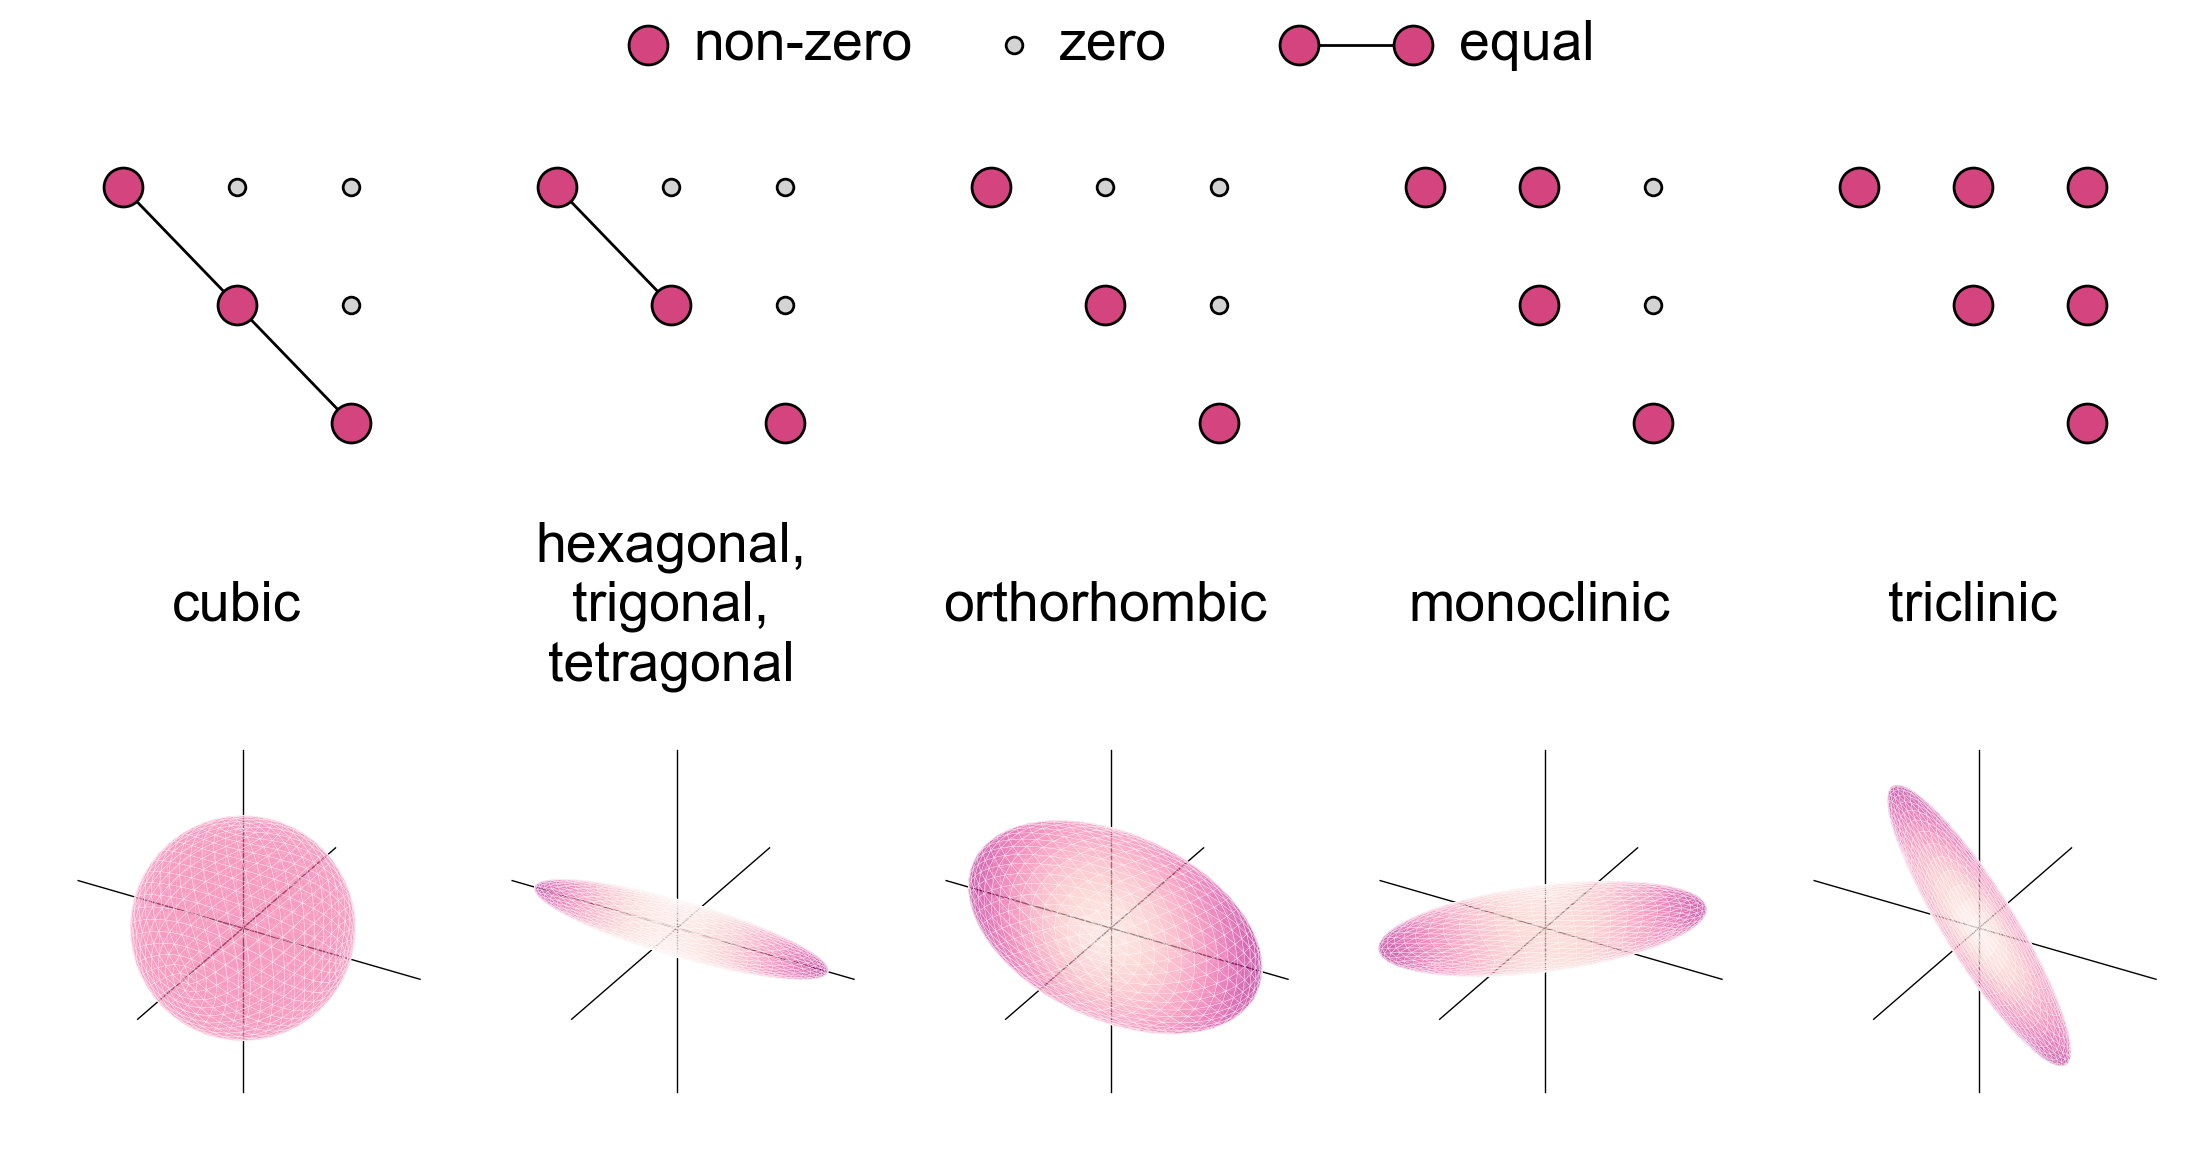

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from pymatgen.core.tensors import DEFAULT_QUAD

def plot_tensor_3d(ax, tensor, lim=(-2.2, 2.2), max_norm=3, scale=3, val=3.5):
    points = DEFAULT_QUAD["points"] @ tensor
    norms = np.linalg.norm(points, axis=1)
    points /= norms.max() / scale
    
    hull = ConvexHull(points)
    triangles = hull.simplices # returns the list of indices for each triangle
    norm = plt.Normalize(vmin=0, vmax=max_norm * 1.3)
    colors = norm(np.linalg.norm(points[triangles].sum(axis=1) / 3, axis=1))
    
    ax.plot_trisurf(
        *points.T,
        triangles=triangles,
        linewidth=0.1,
        edgecolor="white",
        facecolor=plt.cm.RdPu(colors, alpha=0.4),
        rasterized=True
    )
    
    ax.plot([-val, val], [0, 0], [0, 0], 'k-', linewidth=0.5)
    ax.plot([0, 0], [-val, val], [0, 0], 'k-', linewidth=0.5)
    ax.plot([0, 0], [0, 0], [-val, val], 'k-', linewidth=0.5)
    
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax._axis3don = False
    ax.set(xlim=lim, ylim=lim, zlim=lim, xticks=[], yticks=[], zticks=[])
    ax.set_aspect('equal')

val_kwargs = dict(marker='o', markersize=14, markerfacecolor=f"C1", markeredgecolor="k", markeredgewidth=1)
nul_kwargs = dict(marker='o', markersize=6, markerfacecolor="lightgray", markeredgecolor="k", markeredgewidth=1)
    
def plot_tensor_2d(ax, sym):
    if sym == "cubic":
        ax.plot(0, 2, **val_kwargs)
        ax.plot(1, 1, **val_kwargs)
        ax.plot(2, 0, **val_kwargs)
        ax.plot(1, 2, **nul_kwargs)
        ax.plot(2, 1, **nul_kwargs)
        ax.plot(2, 2, **nul_kwargs)
        ax.plot([0, 2], [2, 0], lw=1, color="k", zorder=-1)
    if sym == "tet":
        ax.plot(0, 2, **val_kwargs)
        ax.plot(1, 1, **val_kwargs)
        ax.plot(2, 0, **val_kwargs)
        ax.plot(1, 2, **nul_kwargs)
        ax.plot(2, 1, **nul_kwargs)
        ax.plot(2, 2, **nul_kwargs)
        ax.plot([0, 1], [2, 1], lw=1, color="k", zorder=-1)
    if sym == "orth":
        ax.plot(0, 2, **val_kwargs)
        ax.plot(1, 1, **val_kwargs)
        ax.plot(2, 0, **val_kwargs)
        ax.plot(1, 2, **nul_kwargs)
        ax.plot(2, 1, **nul_kwargs)
        ax.plot(2, 2, **nul_kwargs)
    if sym == "mono":
        ax.plot(0, 2, **val_kwargs)
        ax.plot(1, 1, **val_kwargs)
        ax.plot(2, 0, **val_kwargs)
        ax.plot(1, 2, **val_kwargs)
        ax.plot(2, 1, **nul_kwargs)
        ax.plot(2, 2, **nul_kwargs)
    if sym == "tri":
        ax.plot(0, 2, **val_kwargs)
        ax.plot(1, 1, **val_kwargs)
        ax.plot(2, 0, **val_kwargs)
        ax.plot(1, 2, **val_kwargs)
        ax.plot(2, 1, **val_kwargs)
        ax.plot(2, 2, **val_kwargs)
        
    ax.set(xlim=(-0.9, 2.9), ylim=(-0.9, 2.9))
    ax.set_axis_off()

fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(2, 5, 1, zorder=100)
ax2 = fig.add_subplot(2, 5, 2, zorder=100)
ax3 = fig.add_subplot(2, 5, 3, zorder=100)
ax4 = fig.add_subplot(2, 5, 4, zorder=100)
ax5 = fig.add_subplot(2, 5, 5, zorder=100)
ax6 = fig.add_subplot(2, 5, 6, projection='3d')
ax7 = fig.add_subplot(2, 5, 7, projection='3d')
ax8 = fig.add_subplot(2, 5, 8, projection='3d')
ax9 = fig.add_subplot(2, 5, 9, projection='3d')
ax10 = fig.add_subplot(2, 5, 10, projection='3d')

plot_tensor_2d(ax1, "cubic")
plot_tensor_2d(ax2, "tet")
plot_tensor_2d(ax3, "orth")
plot_tensor_2d(ax4, "mono")
plot_tensor_2d(ax5, "tri")

plot_tensor_3d(ax6, np.array([[2, 0, 0], [0, 2, 0], [0, 0, 2]]), scale=2)
plot_tensor_3d(ax7, np.array([[3, 0, 0], [0, 0.5, 0], [0, 0, 0.5]]))
plot_tensor_3d(ax8, np.array([[3, 0, 0], [0, 0.5, 0], [0, 0, 2]]))
plot_tensor_3d(ax9, np.array([[3, 1.5, 0], [1.5, 3, 0], [0, 0, 1]]))
plot_tensor_3d(ax10, np.array([[3, -1, -1], [-1, 1, -1], [-1, -1, 4]]))

fontsize = 20
ax1.text(0.5, -0.17, "cubic", zorder=1000, ha="center", va="center", transform=ax1.transAxes, fontsize=fontsize)
ax2.text(0.5, -0.17, "hexagonal,\ntrigonal,\ntetragonal", zorder=1000, ha="center", va="center", transform=ax2.transAxes, fontsize=fontsize)
ax3.text(0.5, -0.17, "orthorhombic", zorder=1000, ha="center", va="center", transform=ax3.transAxes, fontsize=fontsize)
ax4.text(0.5, -0.17, "monoclinic", zorder=1000, ha="center", va="center", transform=ax4.transAxes, fontsize=fontsize)
ax5.text(0.5, -0.17, "triclinic", zorder=1000, ha="center", va="center", transform=ax5.transAxes, fontsize=fontsize)

x = 1.7
y = 3.2
ax3.plot([-4.5+x-0.2], [y], **val_kwargs, zorder=10000, clip_on=False)
ax3.plot([1+x, 2+x], [y, y], **val_kwargs, zorder=10000, clip_on=False, lw=1, color="k")
ax3.plot([-1.5+x], [y], **nul_kwargs, zorder=10000, clip_on=False)
ax3.text(-4.1+x-0.2, y, "non-zero", zorder=1000, ha="left", va="center", fontsize=fontsize)
ax3.text(-1.1+x, y, "zero", zorder=1000, ha="left", va="center", fontsize=fontsize)
ax3.text(2.4+x, y, "equal", zorder=1000, ha="left", va="center", fontsize=fontsize)

plt.subplots_adjust(wspace=0, hspace=0.4)
plt.savefig("plots/fig1.pdf", bbox_inches="tight")

## Fig 2 – MP dataset distribution

In [3]:
order = ["Triclinic", "Monoclinic", "Orthorhombic", "Tetragonal", "Trigonal", "Hexagonal", "Cubic"]

def sym_violin(ax, y, ylabel, ylim, show_mean=True, cut=2):
    sns.violinplot(
        x='crystal_system',
        y=y,
        inner=None,
        data=MP_dielectric,
        gridsize=10000,
        order=order,
        bw_method="silverman",
        palette={o: c for o, c in zip(order, color_set)},
        hue="crystal_system",
        cut=cut,
        ax=ax,
    )
    ax.set(ylabel=ylabel, xlabel="", ylim=ylim)
    sns.despine(right=True, left=False, bottom=True, ax=ax)
    ax.tick_params(bottom=False)

    if show_mean:
        ax.axhline(MP_dielectric[y].mean(), ls="--", c="grey", zorder=-10)

In [4]:
def bar_chart_stats(ax, width=0.5):
    crystal_counts = MP_dielectric['crystal_system'].value_counts()[order]
    crystal_counts = crystal_counts.reset_index()
    crystal_counts.columns = ['crystal_system', 'count']  ##################
    p = sns.barplot(
        data=crystal_counts,
        x="count",
        y="crystal_system",
        order=order,
        palette={o: c for o, c in zip(order, color_set)},
        hue="crystal_system",
        width=width,
        ax=ax
    )
    for i, cont in enumerate(ax.containers):
        p = cont.patches[0]
        ax.text(p.get_width() - 50, p.xy[1] + (p.get_height() / 2), crystal_counts['count'].iloc[i], fontsize=10, ha='right', va='center')
    ax.set(ylabel="", xlabel="")
    ax.set_xticks([])
    ax.tick_params(axis='y', which='both', length=0)
    sns.despine(right=True, left=False, bottom=True, ax=ax)


C:\Users\10450\AppData\Local\Temp\ipykernel_14164\643274470.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("plots/fig2.pdf", bbox_inches="tight")
C:\Users\10450\AppData\Local\Temp\ipykernel_14164\643274470.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("plots/fig2.pdf", bbox_inches="tight")
C:\Users\10450\anaconda3\envs\valml\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


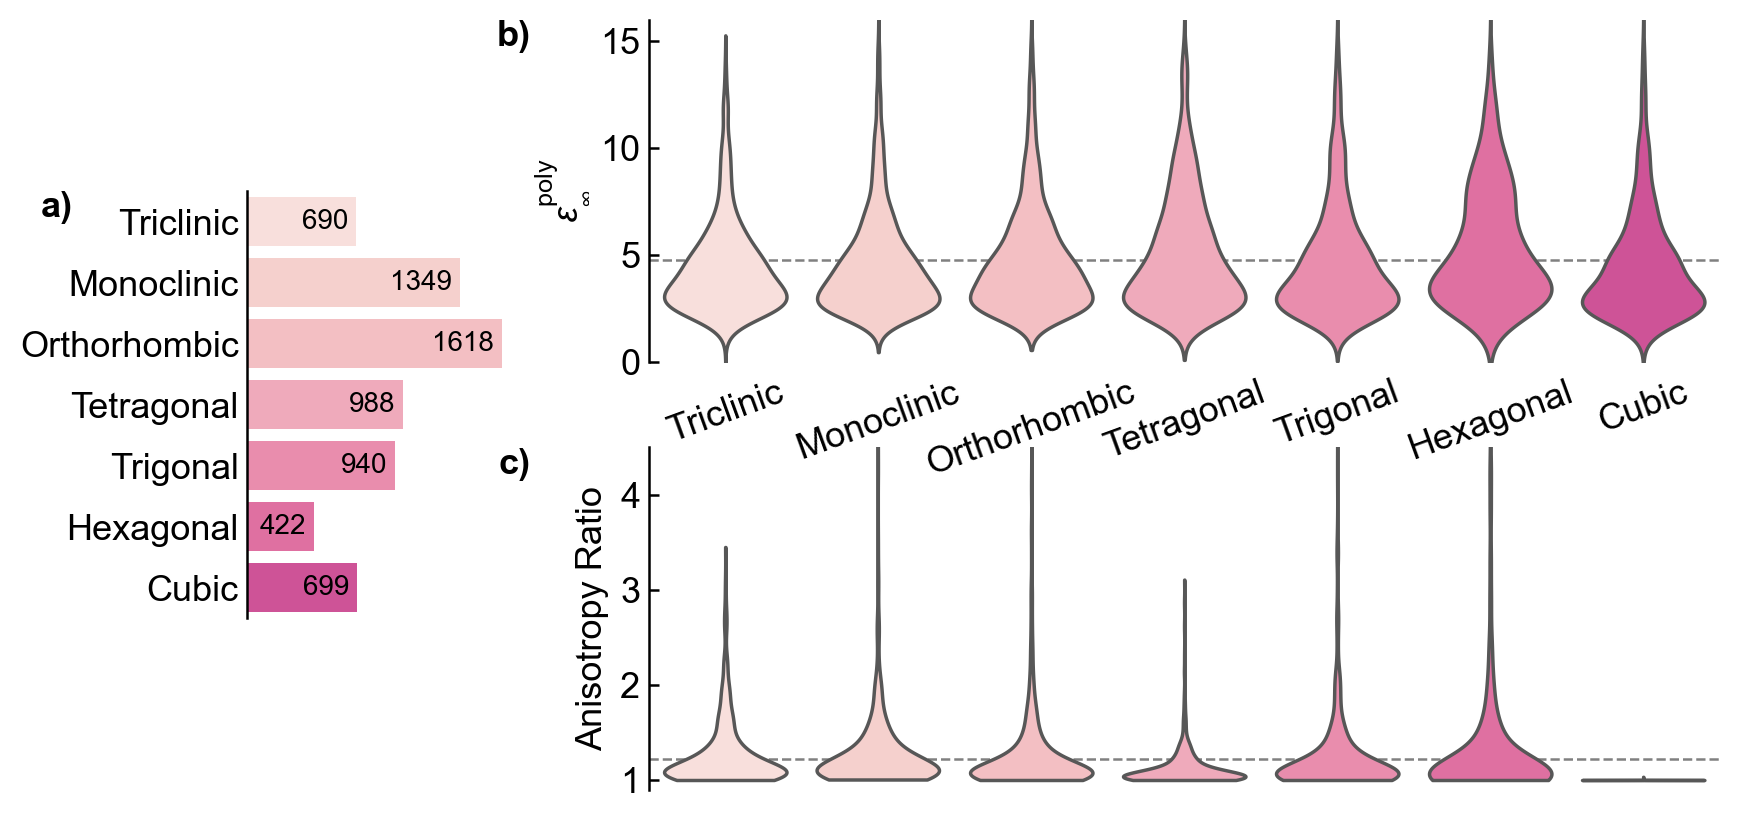

In [5]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True, figsize=(9.5, 5))
gs = gridspec.GridSpec(10, 4, wspace=0.5, hspace=100000)

ax1 = fig.add_subplot(gs[2:8, 0])
bar_chart_stats(ax1, width=0.8)

ax2 = fig.add_subplot(gs[0:5, 1:])
ax3 = fig.add_subplot(gs[5:, 1:])

sym_violin(ax2, "dielectric_scalar", "$\epsilon^\mathrm{poly}_\infty$", (0, 16))
sym_violin(ax3, "ar", "Anisotropy Ratio", (0.9, 4.5), cut=0)

ax3.set_xticklabels([])
ax1.set_zorder(-11)
ax3.set_zorder(-10)
ax2.tick_params(axis='x', which='major', pad=5, rotation=20)

ax1.text(-0.65, 1, "a)", transform=ax1.transAxes, va="top", ha="right", weight="bold", font="arial")
ax2.text(-0.11, 1, "b)", transform=ax2.transAxes, va="top", ha="right", weight="bold", font="arial")
ax3.text(-0.11, 1, "c)", transform=ax3.transAxes, va="top", ha="right", weight="bold", font="arial")

plt.savefig("plots/fig2.pdf", bbox_inches="tight")

## Fig 4 – Polycrystalline prediction

In [6]:
from matplotlib.colors import LogNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def plot_nice_scatter(x, y, lim, xlabel=None, ylabel=None, cmap=cmap, vmin=0.3, mae_label="MAE"): 
    g = sns.jointplot(
        x=x,
        y=y,
        height=4.2,
        kind="hex",
        ratio=10,
        xlim=lim,
        ylim=lim,
        cmap=cmap,
        gridsize=40,
        space=0,
        marginal_kws=dict(bins=40, fill=True, edgecolor="w", facecolor="lightgrey", binrange=lim),
        joint_kws=dict(extent=lim+lim),  # needed to keep hexagons regular size
        norm=LogNorm(vmin=vmin),
    )

    # use inset for constant positioning
    cbar_ax = g.ax_joint.inset_axes([0.1, 0.895, 0.45, 0.035])
    cbar = plt.colorbar(cax=cbar_ax, orientation='horizontal')
    cbar.ax.set(xlim=(1, max(g.ax_joint.collections[0].get_array())))
    cbar.ax.text(0.58, 0.905, "count", transform=g.ax_joint.transAxes, va="center", ha="left", fontsize=12)
    cbar.ax.tick_params(axis='both', which='major', labelsize=12)
    
    g.ax_joint.plot(lim, lim, ls="--", c=".5")
    g.ax_joint.set(
        xlabel=xlabel,
        ylabel=ylabel,
        facecolor=sns.color_palette(cmap, as_cmap=True).get_under()
    )
    g.ax_joint.yaxis.set_major_locator(MaxNLocator(5))
    g.ax_joint.xaxis.set_major_locator(MaxNLocator(5))

    # hide tick marks on marginal axes
    g.ax_marg_x.tick_params(axis='both', which='both', length=0)
    g.ax_marg_y.tick_params(axis='both', which='both', length=0)
    
    mae = np.abs(x - y).mean()
    plt.text(0.92, 0.08, f'{mae_label}: {mae:.3f}', transform=g.ax_joint.transAxes, va="bottom", ha="right", fontsize=12)
    return g

In [7]:
MP_dielectric_test["scalar_ae"] = abs(MP_dielectric_test['dielectric_scalar'] - MP_dielectric_test['cart_pred_scalar'])
MP_dielectric_test["6x0e_l2_scalar_ae"] = abs(MP_dielectric_test['dielectric_scalar'] - MP_dielectric_test['6x0e_l2_cart_pred_scalar'])

scalar_mae = MP_dielectric_test.groupby('crystal_system')['scalar_ae'].mean().reset_index().rename({"scalar_ae": "MAE"}, axis=1)
scalar_mae["type"] = "equivariant"

d = MP_dielectric_test.groupby('crystal_system')['6x0e_l2_scalar_ae'].mean().reset_index().rename({"6x0e_l2_scalar_ae": "MAE"}, axis=1)
d["type"] = "scalar"

scalar_mae = pd.concat([scalar_mae, d])

def sym_vs_scalar_mae(ax, show_mean=True, width=0.5, gap=0.1):
    g = sns.barplot(x='crystal_system', y='MAE', hue="type", data=scalar_mae, order=order, ax=ax, width=width, gap=gap)
    g.legend_.set_title(None)
    ax.set(xlabel="")
    ax.tick_params(axis='x', which='both', length=0, rotation=20)
    sns.despine(right=True, left=False, bottom=True, ax=ax)

    if show_mean:
        ax.axhline(MP_dielectric_test["scalar_ae"].mean(), ls="--", c="C0", zorder=-10)
        ax.axhline(MP_dielectric_test["6x0e_l2_scalar_ae"].mean(), ls="--", c="C1", zorder=-10)
    ax.legend(loc="upper right", ncol=2)

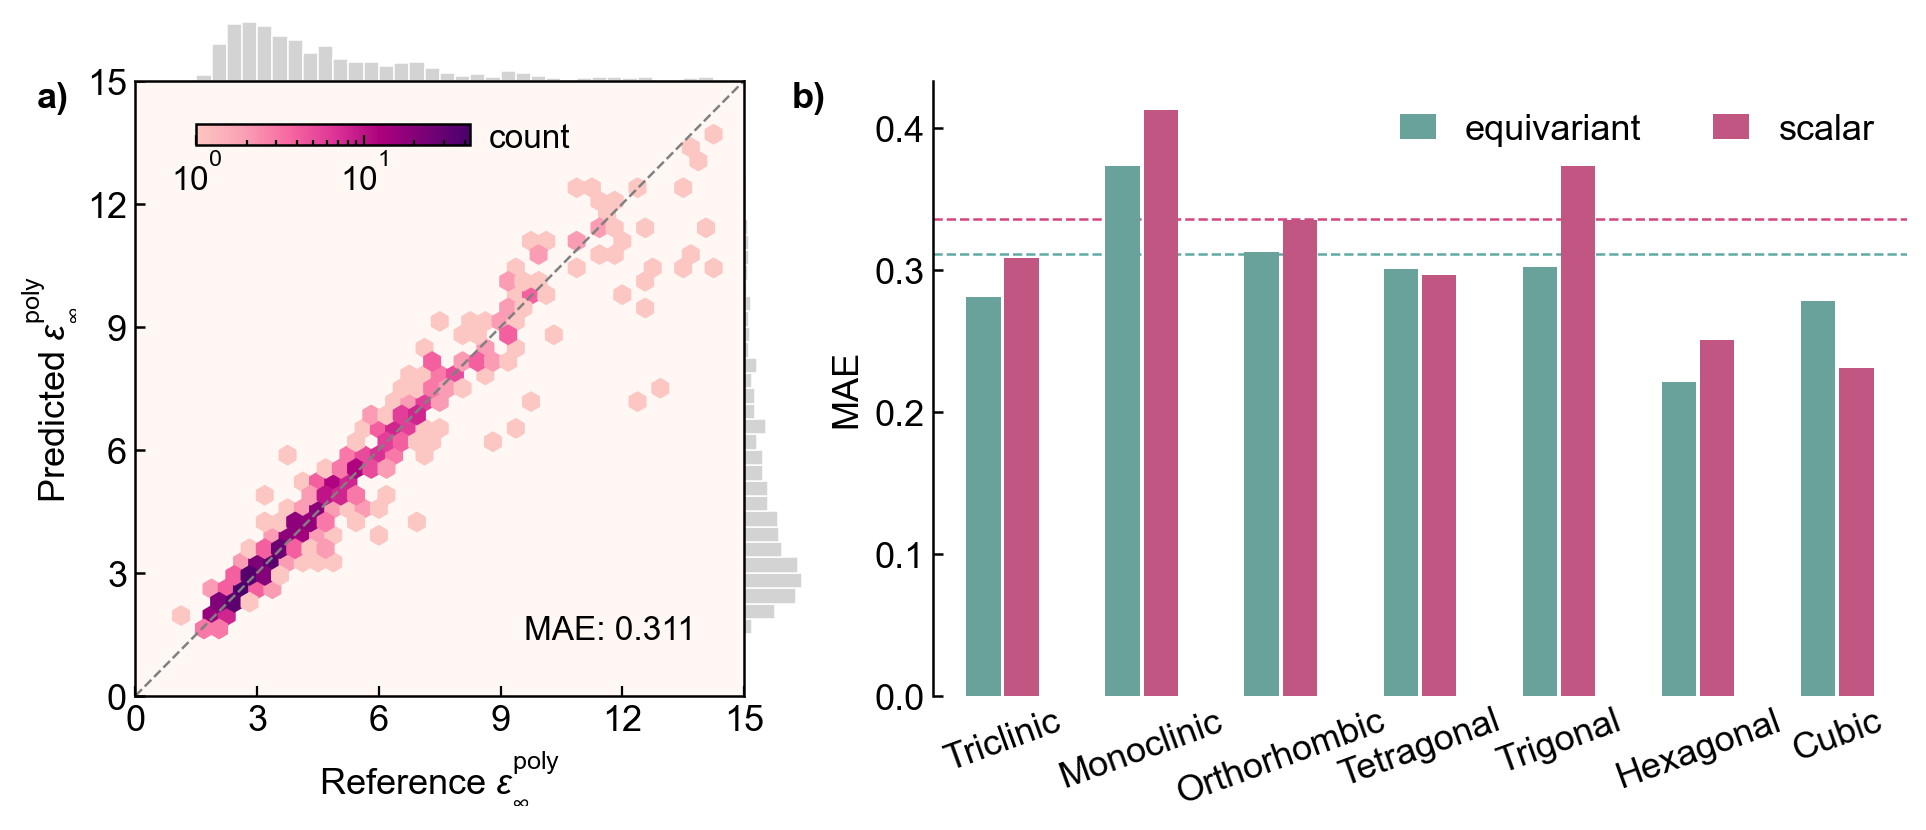

In [8]:
g = plot_nice_scatter(
    MP_dielectric_test.dielectric_scalar, 
    MP_dielectric_test.cart_pred_scalar, 
    lim=(0, 15), 
    xlabel="Reference $\epsilon^\mathrm{poly}_\infty$", 
    ylabel="Predicted $\epsilon^\mathrm{poly}_\infty$",
    cmap="RdPu",
)

# can't just manually create axes this time, since jointplot
# doesn't have an "axis" option, unlike other plots
# instead, we have to get the size of the plot joint plot
# and use that to insert a new axis to use for the histogram
fig = plt.gcf()
ax1 = plt.gca()
pos = g.ax_joint.get_position()
width = pos.x1 - pos.x0
height = pos.y1 - pos.y0
ax2 = fig.add_axes((pos.x1 + 0.225, pos.y0, width * 1.6, height))

sym_vs_scalar_mae(ax2, width=0.55)

ax1.text(-0.11, 1, "a)", transform=ax1.transAxes, va="top", ha="right", weight="bold", font="arial")
ax2.text(-0.11, 1, "b)", transform=ax2.transAxes, va="top", ha="right", weight="bold", font="arial")
plt.savefig("plots/fig4.pdf", bbox_inches="tight")

## Fig 5 – Anistropy ratio prediction

In [9]:
MP_dielectric_test["ar_ae"] = abs(MP_dielectric_test['ar'] - MP_dielectric_test['ar_pred'])
MP_dielectric_test["6x0e_l2_ar_ae"] = abs(MP_dielectric_test['ar'] - MP_dielectric_test['6x0e_l2_ar_pred'])

ar_mae = MP_dielectric_test.groupby('crystal_system')['ar_ae'].mean().reset_index().rename({"ar_ae": "MAE"}, axis=1)
ar_mae["type"] = "equivariant"

d = MP_dielectric_test.groupby('crystal_system')['6x0e_l2_ar_ae'].mean().reset_index().rename({"6x0e_l2_ar_ae": "MAE"}, axis=1)
d["type"] = "scalar"

ar_mae = pd.concat([ar_mae, d])

def sym_vs_ar_mae(ax, show_mean=True, width=0.5, gap=0.1):
    g = sns.barplot(x='crystal_system', y='MAE', hue="type", data=ar_mae, order=order, ax=ax, width=width, gap=gap)
    g.legend_.set_title(None)
    ax.set(xlabel="")
    ax.tick_params(axis='x', which='both', length=0, rotation=20)
    sns.despine(right=True, left=False, bottom=True, ax=ax)

    if show_mean:
        ax.axhline(MP_dielectric_test["ar_ae"].mean(), ls="--", c="C0", zorder=-10)
        ax.axhline(MP_dielectric_test["6x0e_l2_ar_ae"].mean(), ls="--", c="C1", zorder=-10)

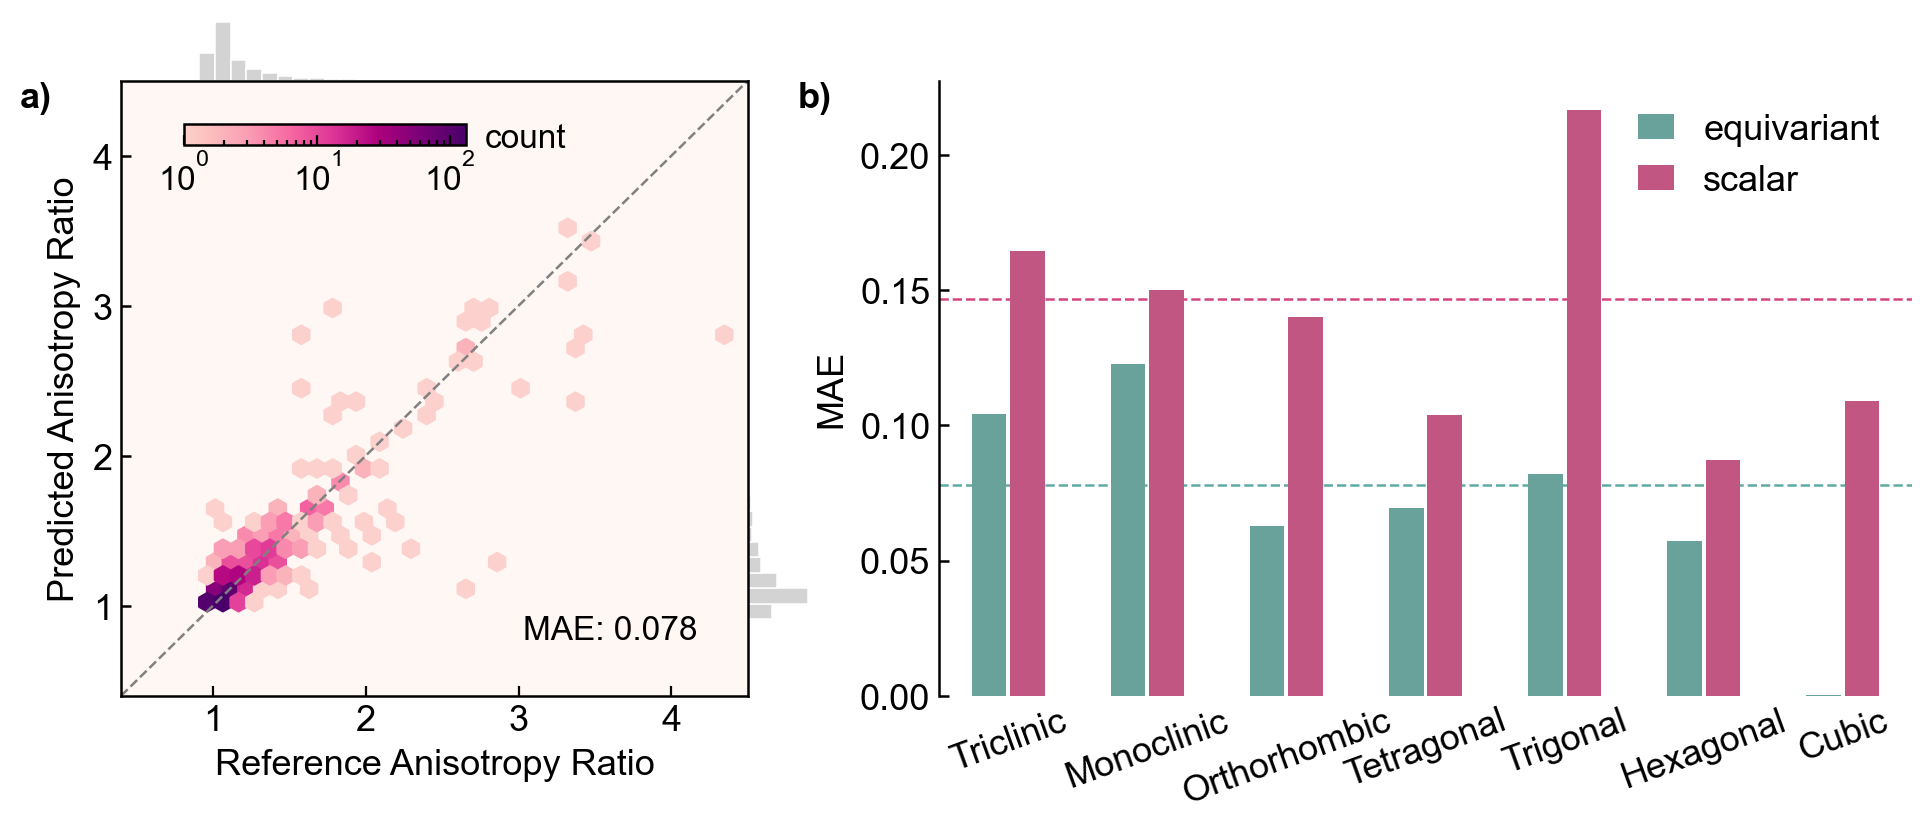

In [10]:
plot_nice_scatter(
    MP_dielectric_test.ar, 
    MP_dielectric_test.ar_pred, 
    lim=(0.4, 4.5),
    xlabel="Reference Anisotropy Ratio", 
    ylabel="Predicted Anisotropy Ratio",
    cmap="RdPu",
)

# can't just manually create axes this time, since jointplot
# doesn't have an "axis" option, unlike other plots
# instead, we have to get the size of the plot joint plot
# and use that to insert a new axis to use for the histogram
fig = plt.gcf()
ax1 = plt.gca()
pos = g.ax_joint.get_position()
width = pos.x1 - pos.x0
height = pos.y1 - pos.y0
ax2 = fig.add_axes((pos.x1 + 0.225, pos.y0, width * 1.6, height))

sym_vs_ar_mae(ax2, width=0.55)

ax1.text(-0.11, 1, "a)", transform=ax1.transAxes, va="top", ha="right", weight="bold", font="arial")
ax2.text(-0.11, 1, "b)", transform=ax2.transAxes, va="top", ha="right", weight="bold", font="arial")

plt.savefig("plots/fig5.pdf", bbox_inches="tight")

## Fig 6 – New Anisotropic Materials Discovery

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def dim_vs_ar(ax):
    sns.violinplot(ax=ax, x='dim', y='ar_pred', inner=None, data=df_MP, order=[0, 1, 2, 3], gridsize=1000, bw_method="silverman", palette='Set2', hue="dim", cut=0)
    for i, c in zip([0, 1, 2, 3], [1, 2, 3, 0]):
        print(i, f"{df_MP[df_MP.dim == i].ar_pred.mean():.2f}")
        ax.axhline(df_MP[df_MP.dim == i].ar_pred.mean(), ls="--", c=plt.cm.Set2.colors[c], zorder=-1)
    ax.set(ylabel='Predicted Anisotropy Ratio', xlabel="", ylim=(0.9, 4.5))
    ax.get_legend().remove()
    sns.despine(right=True, left=False, bottom=True, ax=ax)
    ax.tick_params(bottom=False)
    ax.set_xticklabels(["0D", "1D", "2D", "3D"])

def new_materials_ar(ax):
    bins = np.linspace(0, 8, 71)
    sns.histplot(
        MP_dielectric['ar'],
        bins=bins,
        stat='percent',
        kde=False,
        alpha=0.8,
        edgecolor="w",
        label="Training data",
        ax=ax,
    )
    sns.histplot(
        df_DFT['ar'],
        bins=bins,
        stat='percent',
        kde=False,
        alpha=0.8,
        edgecolor="w",
        label="New discovery",
        ax=ax,
    )
    ax.set(xlabel="Anisotropy Ratio", ylabel="Percent", xlim=(0, 8))
    ax.legend()

0 1.18
1 1.33
2 1.46
3 1.14


C:\Users\10450\AppData\Local\Temp\ipykernel_14164\2586268305.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["0D", "1D", "2D", "3D"])


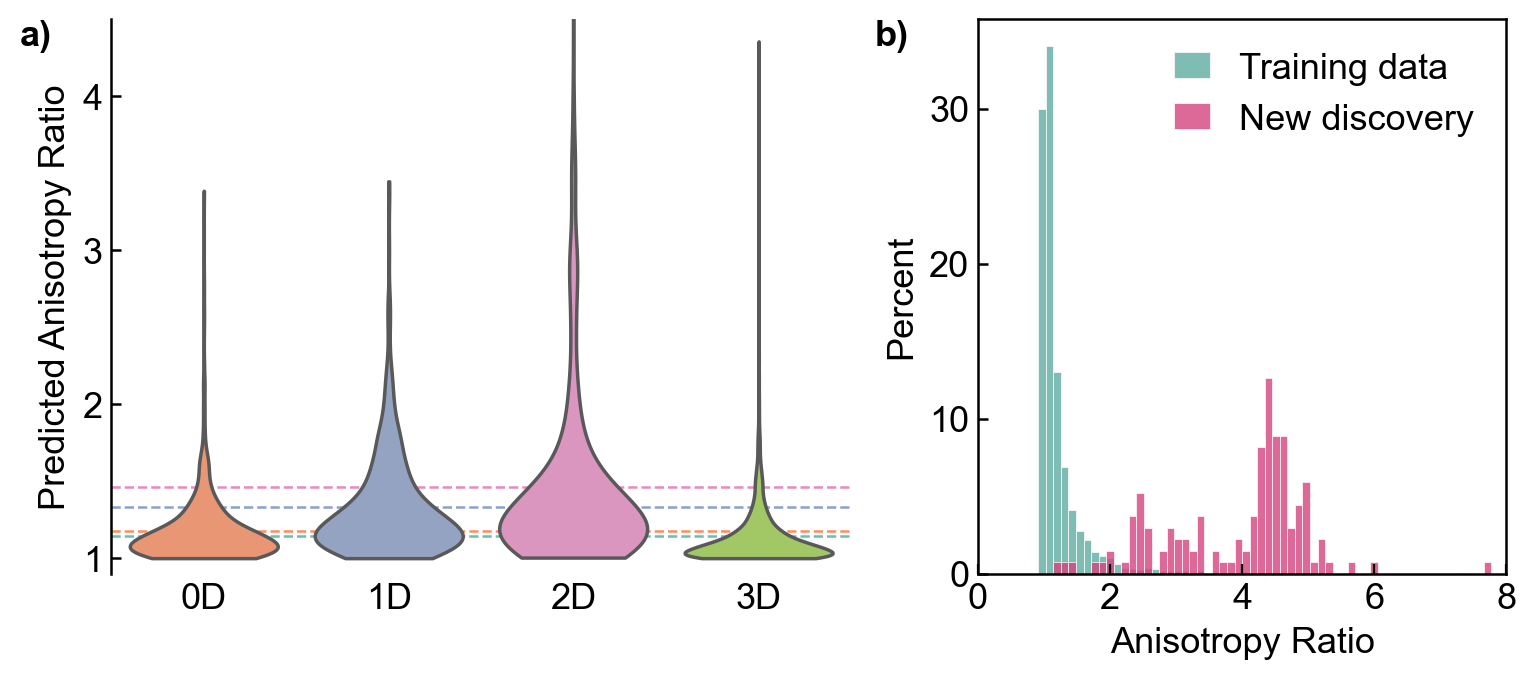

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3.6), gridspec_kw={"width_ratios": [1.4, 1]})
new_materials_ar(axes[1])
dim_vs_ar(axes[0])

axes[1].text(-0.13, 1, "b)", transform=axes[1].transAxes, va="top", ha="right", weight="bold", font="arial")
axes[0].text(-0.08, 1, "a)", transform=axes[0].transAxes, va="top", ha="right", weight="bold", font="arial")

plt.savefig("plots/fig6.pdf", bbox_inches="tight")

## Fig 7 – Optical dielectric

In [22]:
def latexify(text):
    return r"$\mathrm{" + text.replace(" ", "\ ") + "}$"

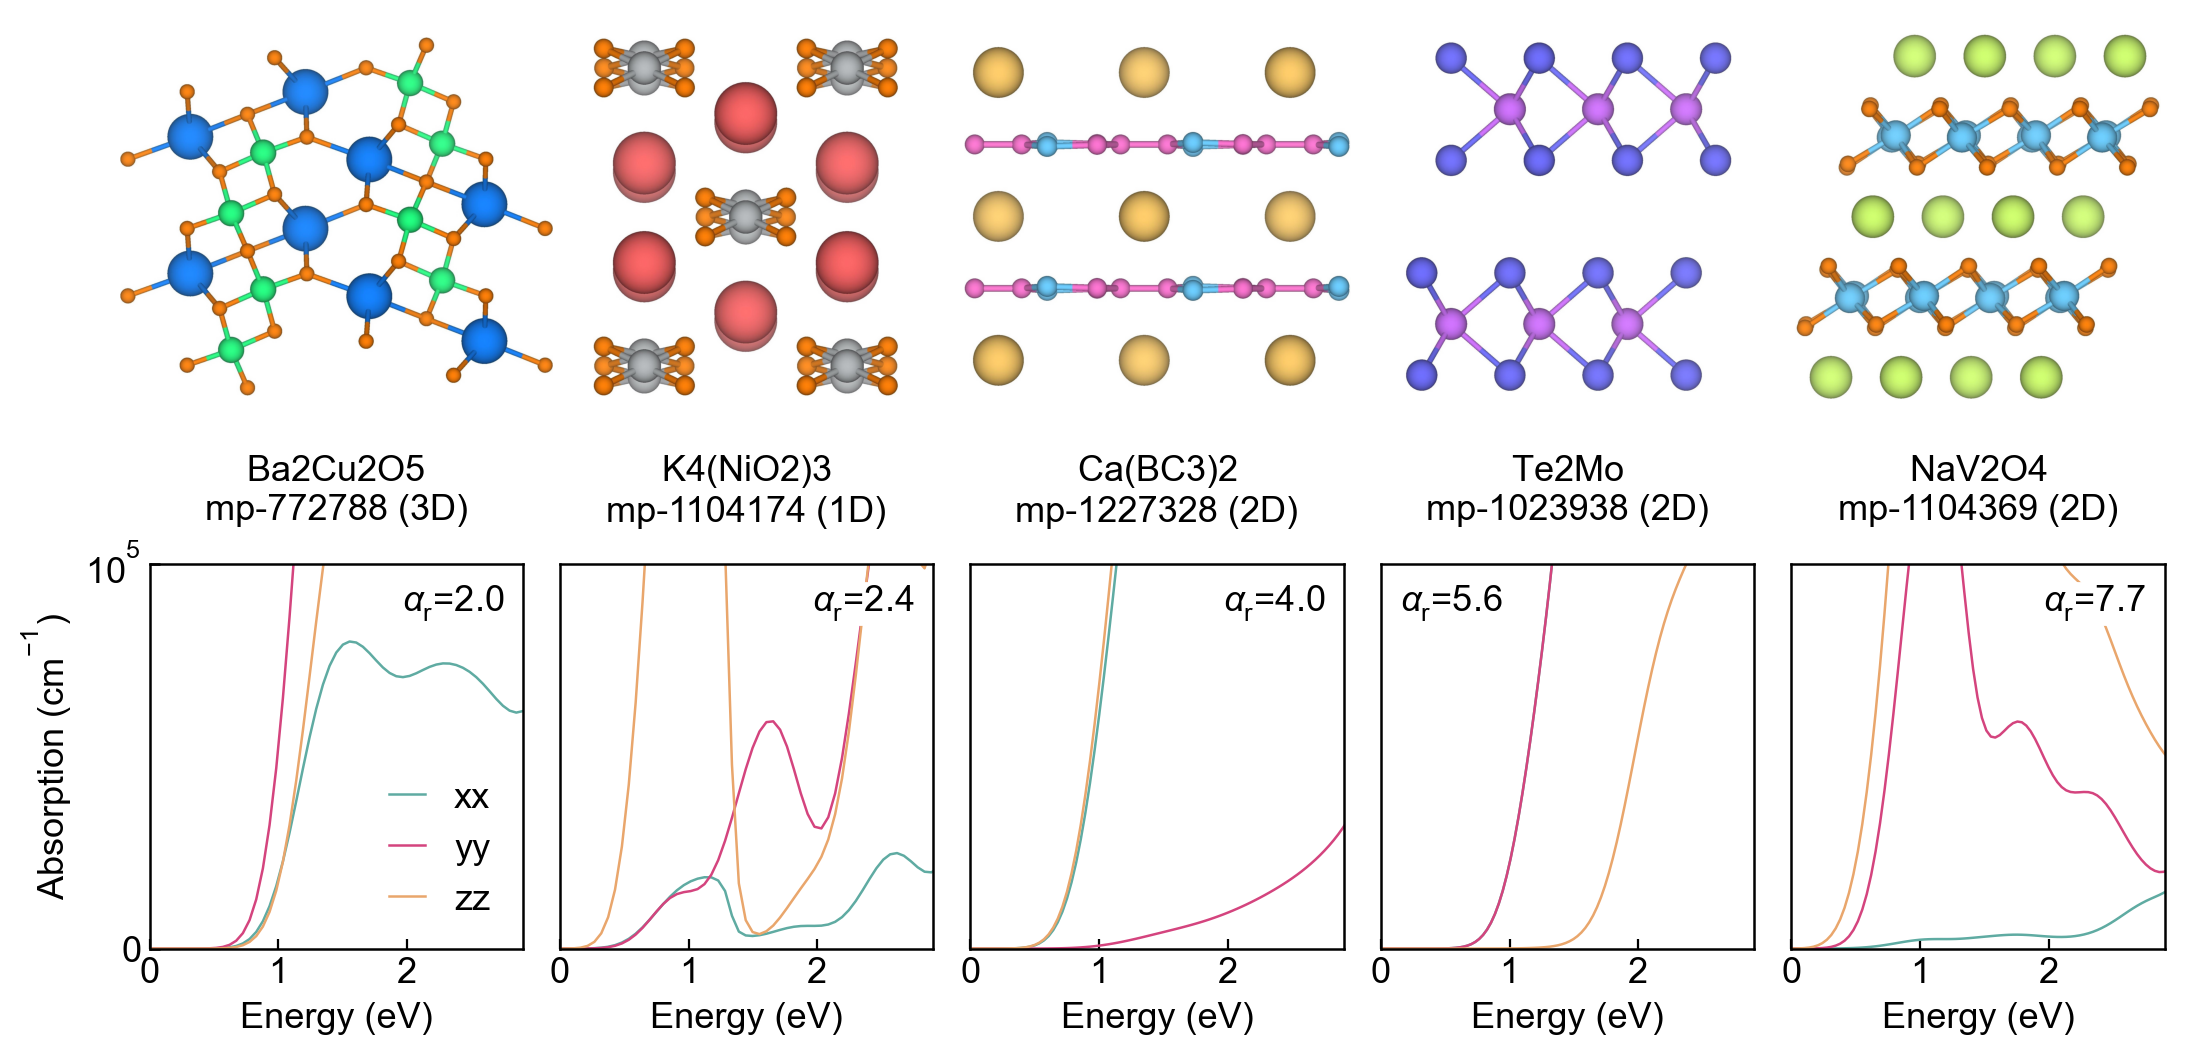

In [23]:
df_opt["ar"] = [df_DFT[df_DFT.mp_id_tag == row.mp_id_tag].iloc[0].ar for _, row in df_opt.iterrows()]
df_opt = df_opt.sort_values("ar").reset_index(drop=True)

from sumo.electronic_structure.optics import calculate_dielectric_properties, broaden_eps
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig, axes = plt.subplots(1, 5, figsize=(13, 2.5))
sigma = 0.2
pos = [
    "right",
    # "left",
    "right", 
    "right", 
    # "left",
    "left", "right"]
images = [
    np.asarray(Image.open('plots/Ba2Cu2O5.jpg')),
    # np.asarray(Image.open('plots/K2PdC2.jpg')),
    np.asarray(Image.open('plots/K4Ni2O6.jpg')),
    np.asarray(Image.open('plots/CaB2C6.jpg')),
    # np.asarray(Image.open('plots/TiNF.jpg')),
    np.asarray(Image.open('plots/MoTe2.jpg')),
    np.asarray(Image.open('plots/NaV2O4.jpg')),
]
scales = np.array([
    0.065,
    # 0.065,
    0.063,
    0.062,
    # 0.06,
    0.065,
    0.06,
]) * 2.4/2

dimen = [3, 1, 2, 2, 2]


df_opt_iter = df_opt.iloc[[0, 2, 3, 5, 6]]
for i, (_,  row) in enumerate(df_opt_iter.iterrows()):
    dielectric = (
        row["ener_diel"],
        row["real_diel"],
        row["imag_diel"]
    )
    
    if sigma:
        dielectric = broaden_eps(dielectric, sigma)
        
    energies, data = calculate_dielectric_properties(
        dielectric,
        ["absorption"],
        "trace",
    )
    spec_data = {"absorption": (energies, data["absorption"])}
    
    axes[i].plot(energies, data["absorption"], label=["xx", "yy", "zz"])
    axes[i].set(xlim=(0, 2.9), ylim=(0, 1e5), xlabel="Energy (eV)")
    axes[i].text(
        0.5,
        1.19,
        latexify(row.structure.composition.reduced_formula) + f"\n{row.mp_id_tag} ({dimen[i]}D)",
        transform=axes[i].transAxes,
        ha="center",
        va="center",
    )
    
    axes[i].text(
        0.05 if pos[i] == "left" else 0.95,
        0.95,
        f"$\\alpha_\mathrm{{r}}$={row.ar:.1f}",
        transform=axes[i].transAxes,
        ha=pos[i],
        va="top",
        bbox=dict(facecolor='w', edgecolor="w", pad=0.0001)
    )
    
    if i> 0:
        axes[i].set_yticks([])
    
    if images[i] is not None:
        imagebox = OffsetImage(images[i], zoom=scales[i], resample=True)
        ab = AnnotationBbox(imagebox, (0.5, 1.9), frameon=False, xycoords="axes fraction", box_alignment=(0.5, 0.5), clip_on=False)
        axes[i].add_artist(ab)
    
    print()
        
axes[0].set(ylabel="Absorption (cm$^{-1}$)", yticks=[0, 1e5], yticklabels=["0", "10$^5$"])
axes[0].legend()
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.savefig("plots/fig7.pdf", bbox_inches="tight", dpi=300, pad_inches=0)
plt.savefig("plots/fig7.png", bbox_inches="tight", dpi=300, pad_inches=0)

# Supporting Information

## SFig 1 2 3

In [29]:
from bokeh.models import (
    ColumnDataSource,
    LinearColorMapper,
    LogColorMapper,
    ColorBar,
    BasicTicker,
)
from bokeh.plotting import figure, output_file
from bokeh.io import show as show_
from bokeh.sampledata.periodic_table import elements
from bokeh.transform import dodge
from csv import reader
from matplotlib.colors import Normalize, LogNorm, to_hex
from matplotlib.cm import (
    plasma,
    inferno,
    magma,
    viridis,
    cividis,
    turbo,
    ScalarMappable,
)
from pandas import options
from typing import List
import warnings

def ptable_plotter(
    filename: str,
    show: bool = True,
    output_filename: str = None,
    width: int = 1050,
    cmap: str = "plasma",
    alpha: float = 0.65,
    extended: bool = True,
    periods_remove: List[int] = None,
    groups_remove: List[int] = None,
    log_scale: bool = False,
    max_value: float = None,
    cbar_height: float = None,
    cbar_standoff: int = 12,
    cbar_fontsize: int = 14,
    blank_color: str = "#c4c4c4",
    under_value: float = None,
    under_color: str = "#140F0E",
    over_value: float = None,
    over_color: str = "#140F0E",
    special_elements: List[str] = None,
    special_color: str = "#6F3023",
) -> figure:

    options.mode.chained_assignment = None

    if cmap == "plasma":
        cmap = plasma
        bokeh_palette = "Plasma256"
    elif cmap == "inferno":
        cmap = inferno
        bokeh_palette = "Inferno256"
    elif cmap == "magma":
        cmap = magma
        bokeh_palette = "Magma256"
    elif cmap == "viridis":
        cmap = viridis
        bokeh_palette = "Viridis256"
    elif cmap == "cividis":
        cmap = cividis
        bokeh_palette = "Cividis256"
    elif cmap == "turbo":
        cmap = turbo
        bokeh_palette = "Turbo256"
    else:
        ValueError("Invalid color map.")

    period_label = ["1", "2", "3", "4", "5", "6", "7"]
    group_range = [str(x) for x in range(1, 19)]

    if groups_remove:
        for gr in groups_remove:
            gr = gr.strip()
            group_range.remove(str(gr))
    if periods_remove:
        for pr in periods_remove:
            pr = pr.strip()
            period_label.remove(str(pr))

    data_elements = []
    data_list = []
    for row in reader(open(filename)):
        data_elements.append(row[0])
        data_list.append(row[1])
    # Convert data to float and cap it at a maximum value of 5000
    data = [min(float(i), max_value) for i in data_list]


    if len(data) != len(data_elements):
        raise ValueError("Unequal number of atomic elements and data points")

    period_label.append("blank")
    period_label.append("La")
    period_label.append("Ac")

    if extended:
        count = 0
        for i in range(56, 70):
            elements.period[i] = "La"
            elements.group[i] = str(count + 4)
            count += 1

        count = 0
        for i in range(88, 102):
            elements.period[i] = "Ac"
            elements.group[i] = str(count + 4)
            count += 1

    if log_scale:
        for datum in data:
            if datum < 0:
                raise ValueError(
                    f"Entry for element {datum} is negative but log-scale is selected"
                )
        color_mapper = LogColorMapper(
            palette=bokeh_palette, low=min(data), high=max(data)
        )
        norm = LogNorm(vmin=min(data), vmax=max(data))
    else:
        color_mapper = LinearColorMapper(
            palette=bokeh_palette, low=min(data), high=max_value if max_value is not None else max(data)
        )
        norm = Normalize(vmin=min(data), vmax=max(data))
    color_scale = ScalarMappable(norm=norm, cmap=cmap).to_rgba(data, alpha=None)

    color_list = [blank_color] * len(elements)

    for i, data_element in enumerate(data_elements):
        element_entry = elements.symbol[
            elements.symbol.str.lower() == data_element.lower()
        ]
        if element_entry.empty == False:
            element_index = element_entry.index[0]
        else:
            warnings.warn("Invalid chemical symbol: " + data_element)
        if color_list[element_index] != blank_color:
            warnings.warn("Multiple entries for element " + data_element)
        elif under_value is not None and data[i] <= under_value:
            color_list[element_index] = under_color
        elif over_value is not None and data[i] >= over_value:
            color_list[element_index] = over_color
        else:
            color_list[element_index] = to_hex(color_scale[i])

    if special_elements:
        for k, v in elements["symbol"].iteritems():
            if v in special_elements:
                color_list[k] = special_color

    source = ColumnDataSource(
        data=dict(
            group=[str(x) for x in elements["group"]],
            period=[str(y) for y in elements["period"]],
            sym=elements["symbol"],
            atomic_number=elements["atomic number"],
            type_color=color_list,
        )
    )

    p = figure(x_range=group_range, y_range=list(reversed(period_label)), tools="save")
    p.width = width
    p.outline_line_color = None
    p.background_fill_color = None
    p.border_fill_color = None
    p.toolbar_location = "above"
    p.rect("group", "period", 0.9, 0.9, source=source, alpha=alpha, color="type_color")
    p.axis.visible = False
    text_props = {
        "source": source,
        "angle": 0,
        "color": "black",
        "text_align": "left",
        "text_baseline": "middle",
    }
    x = dodge("group", -0.4, range=p.x_range)
    y = dodge("period", 0.3, range=p.y_range)
    p.text(
        x=x,
        y="period",
        text="sym",
        text_font_style="bold",
        text_font_size="16pt",
        **text_props,
    )
    p.text(x=x, y=y, text="atomic_number", text_font_size="11pt", **text_props)

    color_bar = ColorBar(
        color_mapper=color_mapper,
        ticker=BasicTicker(desired_num_ticks=10),
        border_line_color=None,
        label_standoff=cbar_standoff,
        location=(0, 0),
        orientation="vertical",
        scale_alpha=alpha,
        major_label_text_font_size=f"{cbar_fontsize}pt",
    )

    if cbar_height is not None:
        color_bar.height = cbar_height

    p.add_layout(color_bar, "right")
    p.grid.grid_line_color = None

    if output_filename:
        output_file(output_filename)

    if show:
        show_(p)

    return p


In [ ]:
df_MP['species'] = df_MP['structure'].map(lambda x: list(set(x.get_chemical_symbols())))
species = species = sorted(list(set(df_MP2['species'].sum())))
count_dict = {}
for atom in species:
    count = 0
    for i in range(len(df_MP2)):
        if atom in df_MP2.loc[i].species:
            count = count + 1
    count_dict[atom] = count

import csv
with open("count.csv", "w", newline="") as f:
    w = csv.writer(f)
    for key,value in count_dict.items():
        w.writerow([key,value])
ptable_plotter("count.csv", max_value=4000)  # Set max value to 4000 for color scaling

In [ ]:
ar_dict = {}
for atom in species:
    ar = 0.
    count = 0
    for i in range(len(df_MP2)):
        if atom in df_MP2.loc[i].species:
            count = count + 1
            ar = ar + df_MP2.loc[i].ar_pred.__abs__()
    ar_dict[atom] = ar/count
with open("ar.csv", "w", newline="") as f:
    w = csv.writer(f)
    for key,value in ar_dict.items():
        w.writerow([key,value])
ptable_plotter("ar.csv", max_value=max(ar_dict.values()))

In [ ]:
scalar_dict = {}
for atom in species:
    scalar = 0.
    count = 0
    for i in range(len(df_MP2)):
        if atom in df_MP2.loc[i].species:
            count = count + 1
            scalar = scalar + df_MP2.loc[i].cart_pred_scalar.__abs__()
    scalar_dict[atom] = scalar/count
    
with open("scalar.csv", "w", newline="") as f:
    w = csv.writer(f)
    for key,value in scalar_dict.items():
        w.writerow([key,value])
ptable_plotter("scalar.csv", max_value=max(scalar_dict.values()))

## SFig 4 - Polycrystalline performance on train, test, and valid

In [24]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

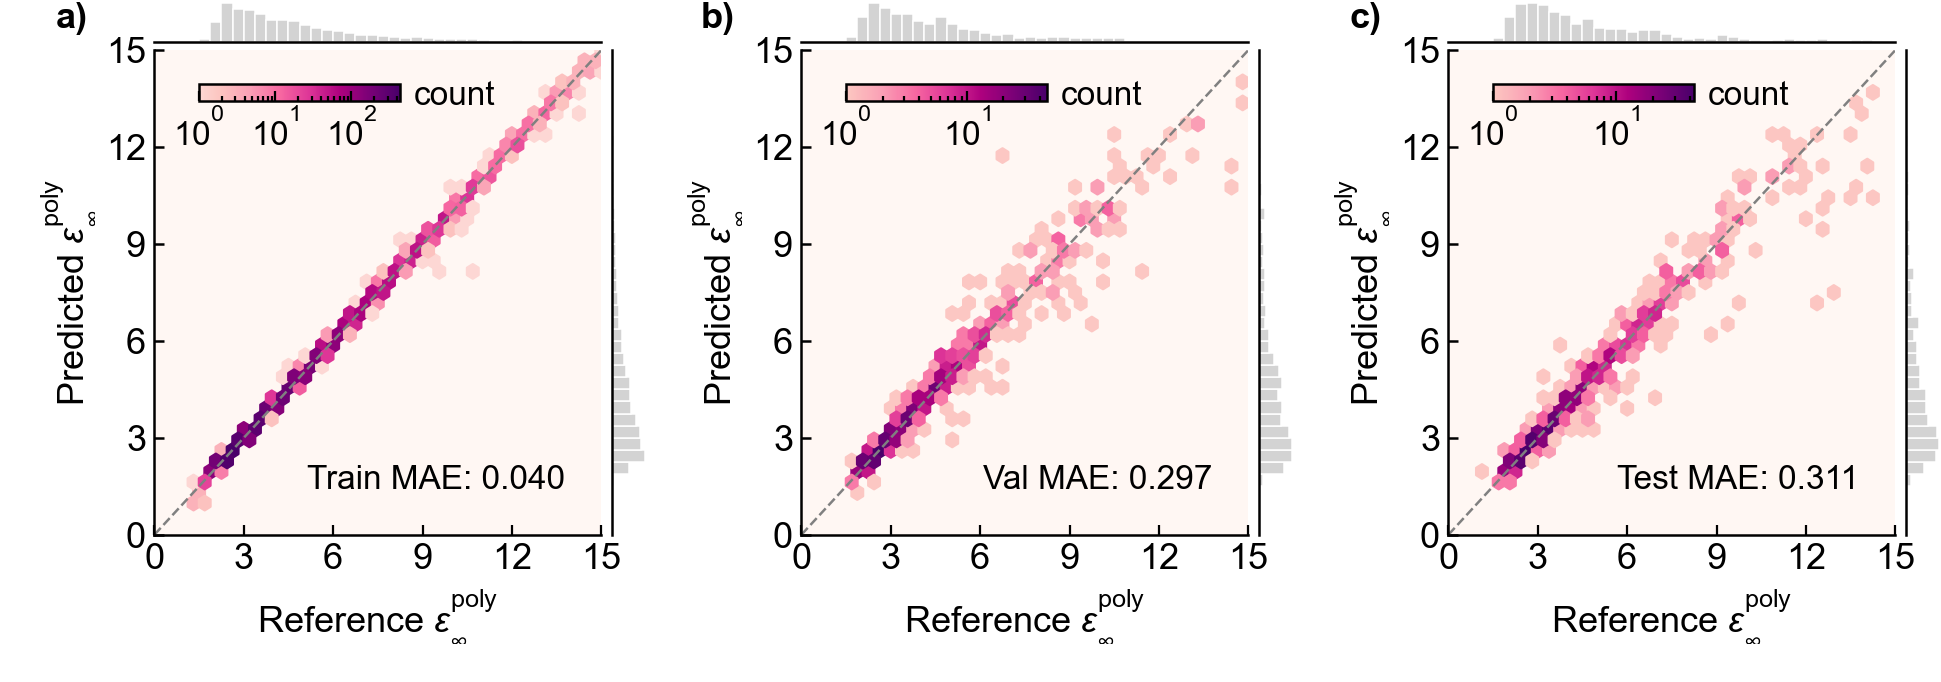

In [25]:
g0 = plot_nice_scatter(
    MP_dielectric_train.dielectric_scalar, 
    MP_dielectric_train.cart_pred_scalar, 
    lim=(0, 15), 
    xlabel="Reference $\epsilon^\mathrm{poly}_\infty$", 
    ylabel="Predicted $\epsilon^\mathrm{poly}_\infty$",
    cmap="RdPu",
    mae_label="Train MAE"
)

g1 = plot_nice_scatter(
    MP_dielectric_valid.dielectric_scalar, 
    MP_dielectric_valid.cart_pred_scalar, 
    lim=(0, 15), 
    xlabel="Reference $\epsilon^\mathrm{poly}_\infty$", 
    ylabel="Predicted $\epsilon^\mathrm{poly}_\infty$",
    cmap="RdPu",
    mae_label="Val MAE"
)

g2 = plot_nice_scatter(
    MP_dielectric_test.dielectric_scalar, 
    MP_dielectric_test.cart_pred_scalar, 
    lim=(0, 15), 
    xlabel="Reference $\epsilon^\mathrm{poly}_\infty$", 
    ylabel="Predicted $\epsilon^\mathrm{poly}_\infty$",
    cmap="RdPu",
    mae_label="Test MAE"
)

fig = plt.figure(figsize=(9.9, 3.6))
gs = gridspec.GridSpec(1, 3)

mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
mg2 = SeabornFig2Grid(g2, fig, gs[2])

plt.tight_layout()

ax0 = g0.ax_joint
ax1 = g1.ax_joint
ax2 = g2.ax_joint

ax0.text(-0.15, 1.1, "a)", transform=ax0.transAxes, va="top", ha="right", weight="bold", font="arial")
ax1.text(-0.15, 1.1, "b)", transform=ax1.transAxes, va="top", ha="right", weight="bold", font="arial")
ax2.text(-0.15, 1.1, "c)", transform=ax2.transAxes, va="top", ha="right", weight="bold", font="arial")

plt.savefig("plots/sfig4.png", bbox_inches="tight")

## SFig 5 - Polycrystalline performance on train, test, and valid

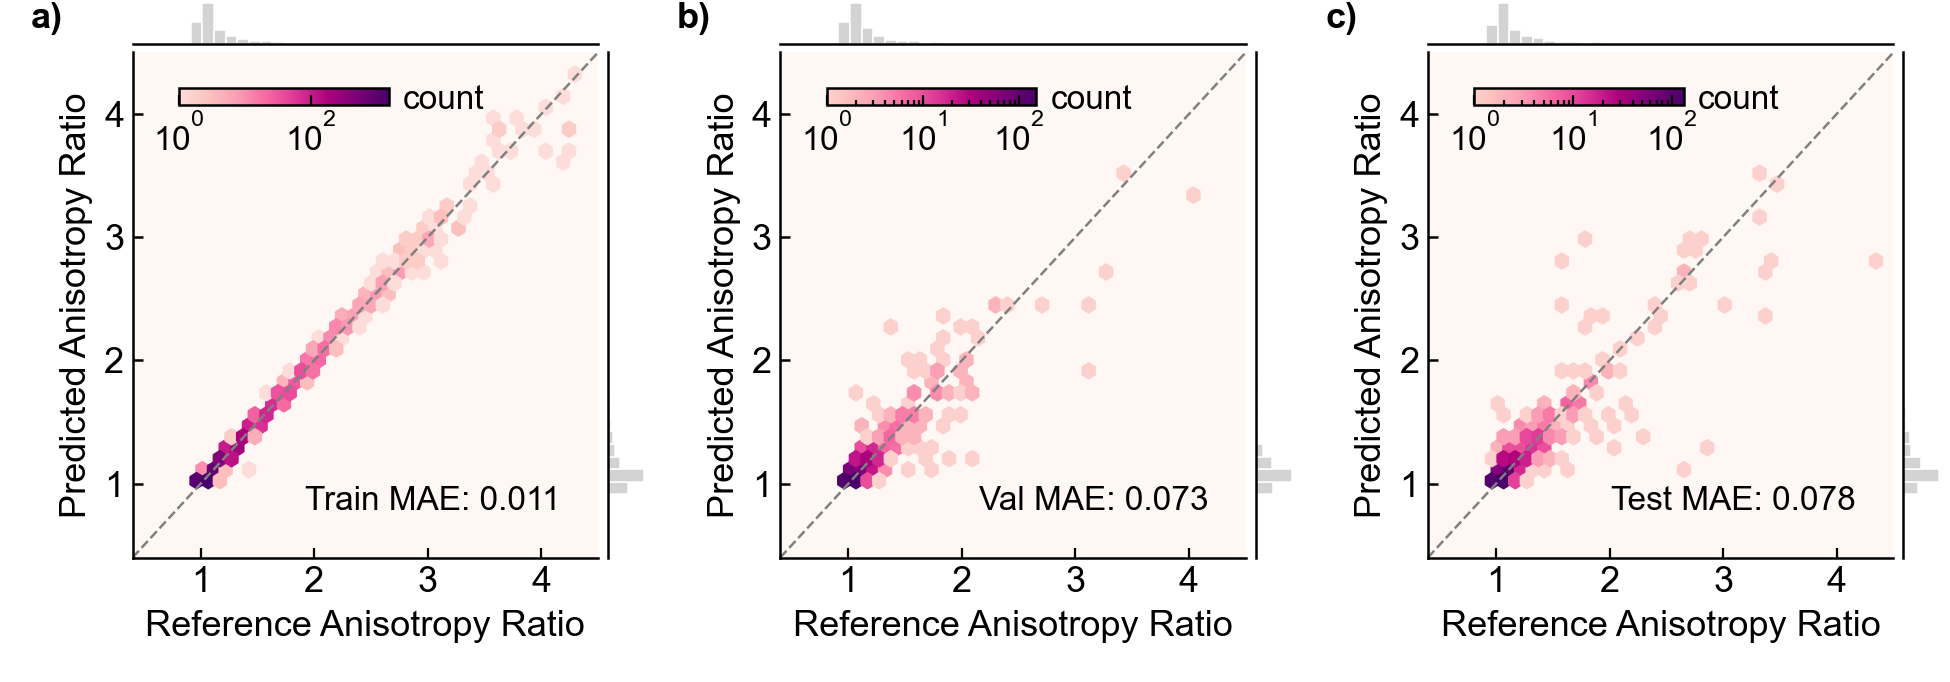

In [26]:
g0 = plot_nice_scatter(
    MP_dielectric_train.ar, 
    MP_dielectric_train.ar_pred, 
    lim=(0.4, 4.5),
    xlabel="Reference Anisotropy Ratio", 
    ylabel="Predicted Anisotropy Ratio",
    cmap="RdPu",
    mae_label="Train MAE"
)

g1 = plot_nice_scatter(
    MP_dielectric_valid.ar, 
    MP_dielectric_valid.ar_pred, 
    lim=(0.4, 4.5),
    xlabel="Reference Anisotropy Ratio", 
    ylabel="Predicted Anisotropy Ratio",
    cmap="RdPu",
    mae_label="Val MAE"
)

g2 = plot_nice_scatter(
    MP_dielectric_test.ar, 
    MP_dielectric_test.ar_pred, 
    lim=(0.4, 4.5),
    xlabel="Reference Anisotropy Ratio", 
    ylabel="Predicted Anisotropy Ratio",
    cmap="RdPu",
    mae_label="Test MAE"
)

fig = plt.figure(figsize=(9.9, 3.6))
gs = gridspec.GridSpec(1, 3)

mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
mg2 = SeabornFig2Grid(g2, fig, gs[2])

ax0 = g0.ax_joint
ax1 = g1.ax_joint
ax2 = g2.ax_joint

ax0.text(-0.15, 1.1, "a)", transform=ax0.transAxes, va="top", ha="right", weight="bold", font="arial")
ax1.text(-0.15, 1.1, "b)", transform=ax1.transAxes, va="top", ha="right", weight="bold", font="arial")
ax2.text(-0.15, 1.1, "c)", transform=ax2.transAxes, va="top", ha="right", weight="bold", font="arial")
plt.tight_layout()
plt.savefig("plots/sfig5.png", bbox_inches="tight")

## STable 1 - Full list of materials discovered

In [27]:
columns = ["material_id", "formula", "formatted_dielectric", "formatted_ar"]
print(df_DFT.sort_values("ar")[::-1][columns].to_latex(
    sparsify=True, index=False, header=["Material ID", "Formula", "Dielectric Tensor", "Anisotropy Ratio"]
    ).replace("midrule\n", "midrule\n\\addlinespace[2ex]\n").replace("\\\nmp-", "\\\n\\addlinespace[2ex]\nmp-")
)

KeyError: "['formula', 'formatted_dielectric', 'formatted_ar'] not in index"

In [28]:
df_DFT

,atoms,material_id,e_hull,cart_pred,cart_pred_scalar,ar_pred,out_raw,dielectric,eigs,ar,bandgap,structure,uuid,dir,input_structure,mp_id_tag
0,"(Atom('Mo', [1.62448488, 0.31475749, 0.0], ind...",mp-1018806,0.028298,"[[5.471566662685307, 2.8866953809477587e-06, 2...",3.834271,9.760138,"[6.641152181426747, 3.2054457452445554e-14, 4....","[[10.73138208, -3.98e-06, 0.0], [-3.98e-06, 10...","[2.21814297, 10.731382067539629, 10.7326533424...",4.838576,0.8104,"[[1.62448488 0.31475749 0. ] Mo, [-2.29...",3fdbbb0b-83d5-4388-903b-6ca281f12eb6,hx1-c07-8-3:/gpfs/home/sw2622/scratch/000_atom...,"[[1.62448488 0.31475749 0. ] Mo, [-2.29...",mp-1018806
1,"(Atom('Ti', [1.531002, 0.0, 7.0515832], index=...",mp-1071956,0.022606,"[[9.69332251593923, 8.965660336024194e-19, 2.6...",6.726174,7.146527,"[11.650075009428207, 3.7093539439766454e-17, 1...","[[8.7737516, 0.0, 0.0], [0.0, 9.82162997, 0.0]...","[2.11838628, 8.7737516, 9.82162997]",4.636373,0.6521,"[[1.531002 0. 7.0515832] Ti, [0. ...",e113f1a9-0775-40aa-abcf-c9e694ccad9f,hx1-c10-8-1:/gpfs/home/sw2622/scratch/000_atom...,"[[1.531002 0. 7.0515832] Ti, [0. ...",mp-1071956
2,"(Atom('W', [0.0, 0.0, 3.42846786], index=0), A...",mp-1023929,0.021838,"[[6.748554788363274, 3.9803799613093123e-16, -...",4.987946,4.60109,"[8.639376382416014, -1.845062162791981e-16, 5....","[[8.54011832, 0.0, 0.0], [0.0, 8.54011871, 0.0...","[1.88943605, 8.54011832, 8.54011871]",4.51993,1.0698,"[[0. 0. 3.42846786] W, [ 1.623...",4ecc73bf-59fd-4a37-bdda-ea171c3b71c9,hx1-c07-8-3:/gpfs/home/sw2622/scratch/000_atom...,"[[0. 0. 3.42846786] W, [ 1.623...",mp-1023929
3,"(Atom('Mo', [0.0, 0.0, 3.40875868], index=0), ...",mp-1026023,0.04196,"[[9.803596185404126, -2.337881916543947e-16, -...",7.274475,4.423543,"[12.599759880059754, -3.1364812380292347e-16, ...","[[9.96077436, 0.0, 0.0], [0.0, 9.96077492, 0.0...","[2.12680853, 9.96077436, 9.96077492]",4.683438,0.9223,"[[0. 0. 3.40875868] Mo, [ 1.61...",3ad518a8-dd7f-4801-ab2c-da502857298c,hx1-c10-8-1:/gpfs/home/sw2622/scratch/000_atom...,"[[0. 0. 3.40875868] Mo, [ 1.61...",mp-1026023
4,"(Atom('W', [0.0, 0.0, -6.99904935], index=0), ...",mp-1025588,0.012852,"[[8.182028335446555, 1.532097878060253e-17, -5...",6.092934,4.273167,"[10.553270866004073, -7.618707087374252e-17, 2...","[[9.79816752, 0.0, 0.0], [0.0, 9.79816873, 0.0...","[2.19502866, 9.79816752, 9.79816873]",4.4638,0.9771,"[[ 0. 0. -6.99904935] W, [ 0...",20e6002d-48f1-4121-9eb8-c0e21a6f1755,hx1-c07-8-3:/gpfs/home/sw2622/scratch/000_atom...,"[[ 0. 0. -6.99904935] W, [ 0...",mp-1025588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,"(Atom('Li', [-3.91382687, 4.6027206, 2.3043527...",mp-752885,0.042682,"[[2.722407831377815, -0.6709192734115607, -0.9...",3.739381,2.658954,"[6.476797305768874, -1.294665715411379, -0.948...","[[3.15166206, -0.83261065, -0.92921816], [-0.8...","[2.7403713667254688, 2.903376529714604, 6.9433...",2.533743,1.3155,"[[-3.91382687 4.6027206 2.30435279] Li, [1....",3d237452-7264-4cfc-814f-c64d5ff055f8,hx1-c07-8-3:/gpfs/home/sw2622/scratch/000_atom...,"[[-3.91382687 4.6027206 2.30435279] Li, [1....",mp-752885
131,"(Atom('Au', [-1.09105527, 5.70626502, 5.953586...",mp-27213,0.0,"[[6.295518787311074, -0.05125721294298793, 2.7...",5.483883,2.514787,"[9.498364801026296, 3.8337273286503937e-10, -0...","[[8.46854991, 0.0099583, 0.0], [0.00995724, 2....","[2.9303105478072755, 8.468567812192724, 9.9480...",3.394863,0.896,"[[-1.09105527 5.70626502 5.95358648] Au, [ 0...",a923cc31-c19d-474b-871a-8dec015cd52b,hx1-c03-1-4:/gpfs/home/sw2622/scratch/000_atom...,"[[-1.09105527 5.70626502 5.95358648] Au, [ 0...",mp-27213
132,"(Atom('K', [-6.45422338, -4.41320944, -4.65018...",mp-1223545,0.018041,"[[2.893803702410491, 0.011884942518686428, 0.2...",5.486395,2.53058,"[9.502715014788436, 0.38544310439569485, 0.016...","[[2.79608512, 0.0090569, 0.21670849], [0.00898...","[2.78109091156409, 5.933501292475964, 6.735506...",2.421894,0.8586,"[[-6.45422338 -4.41320944 -4.65018345] K, [-0....",4f50a563-cbb